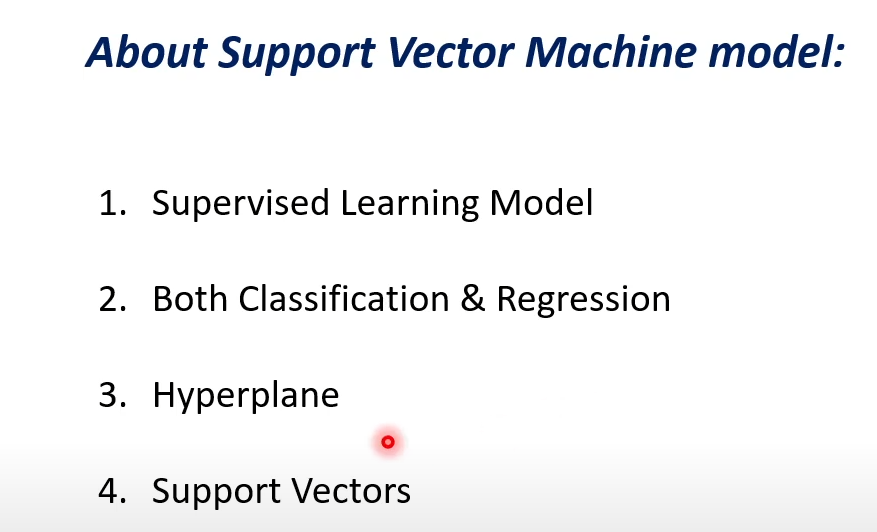

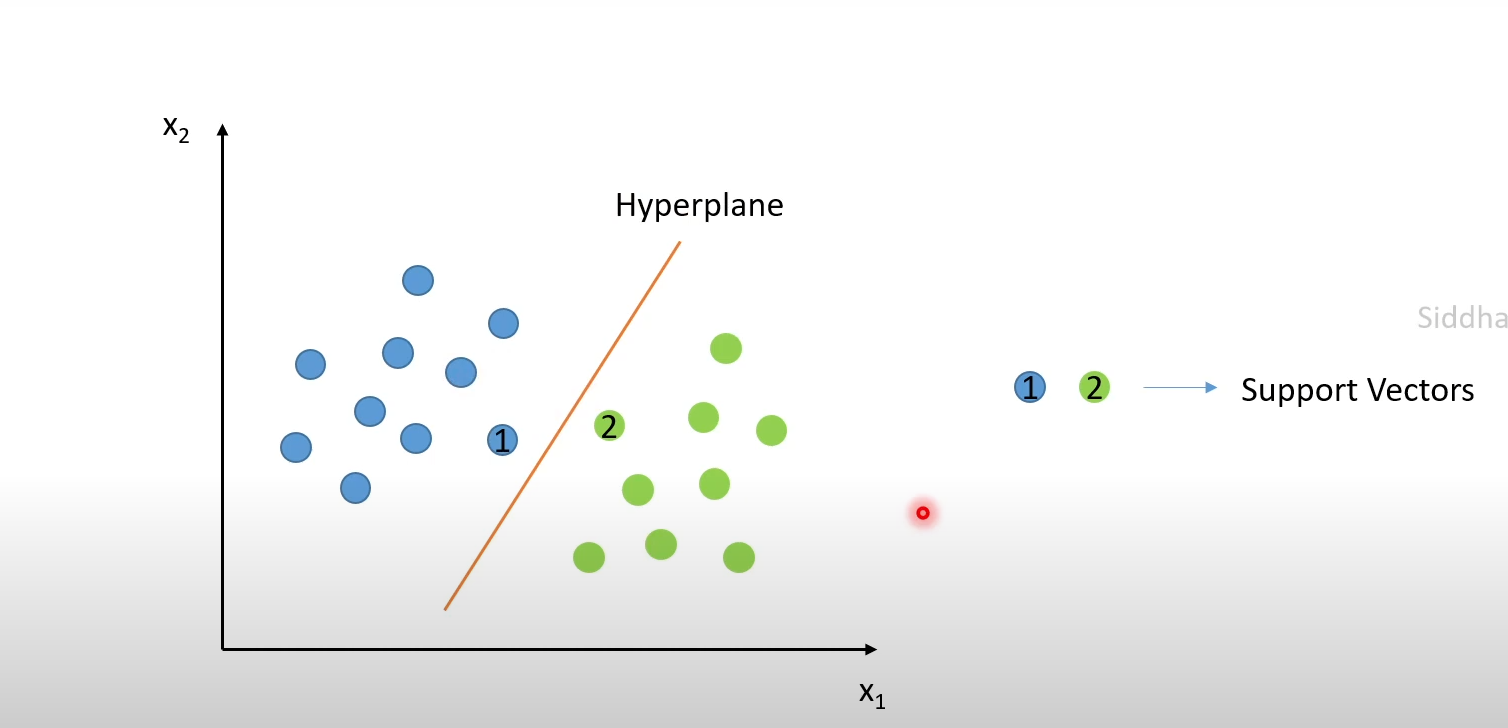

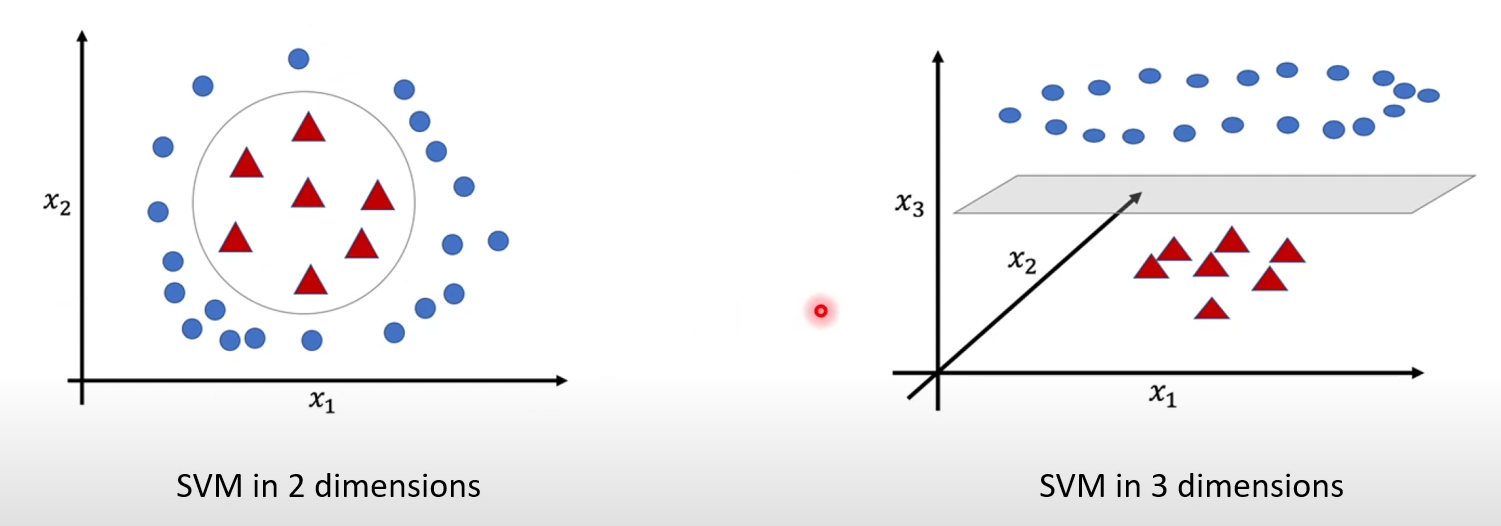

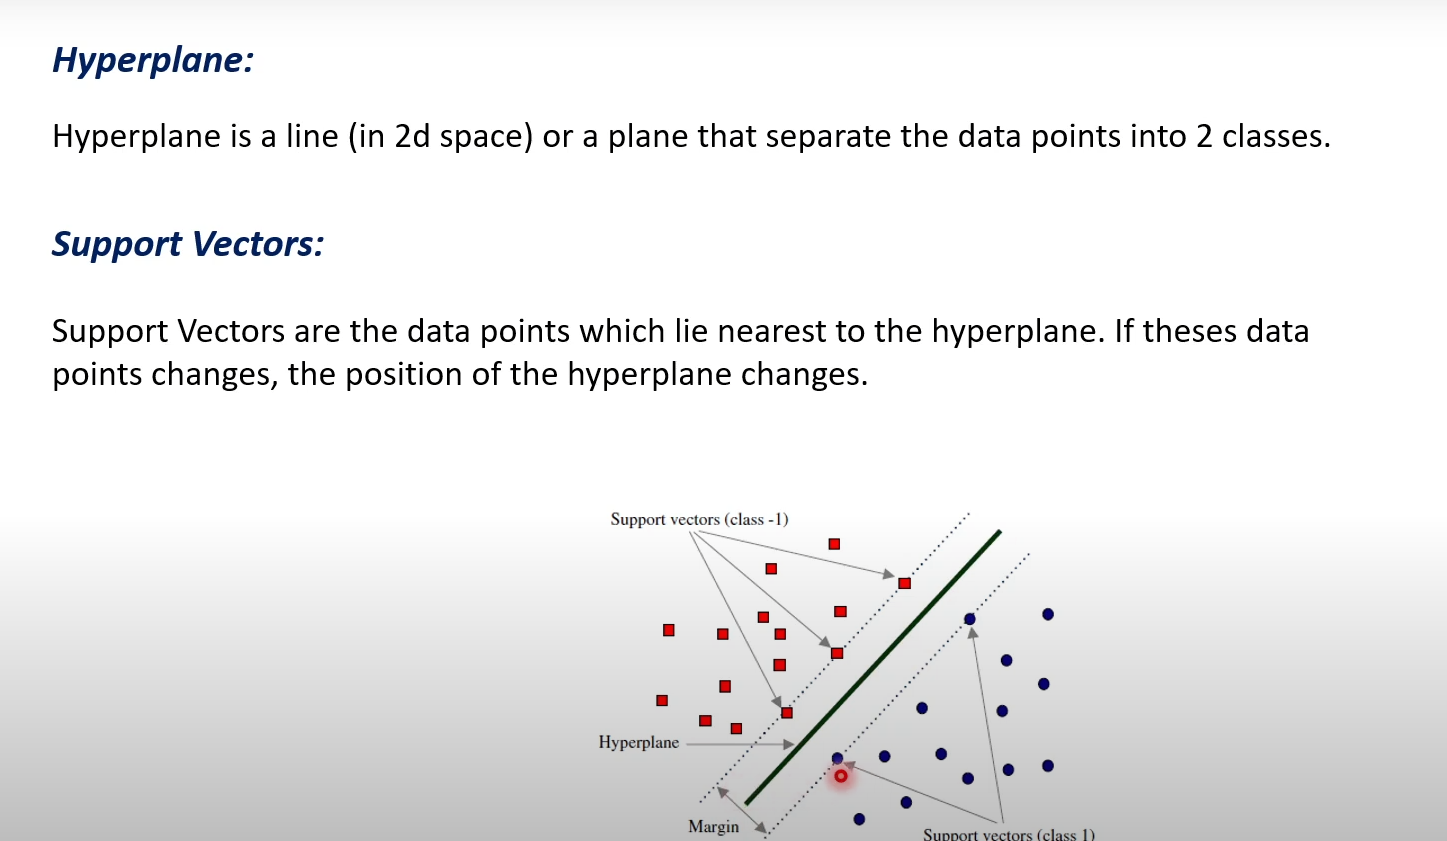

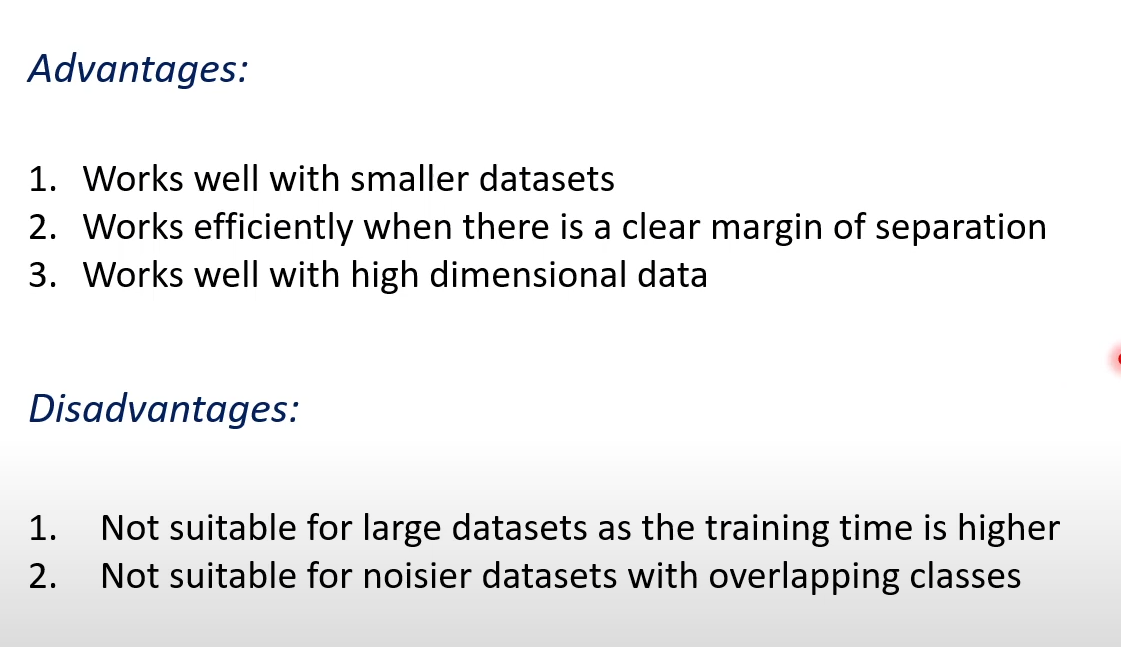

Inference

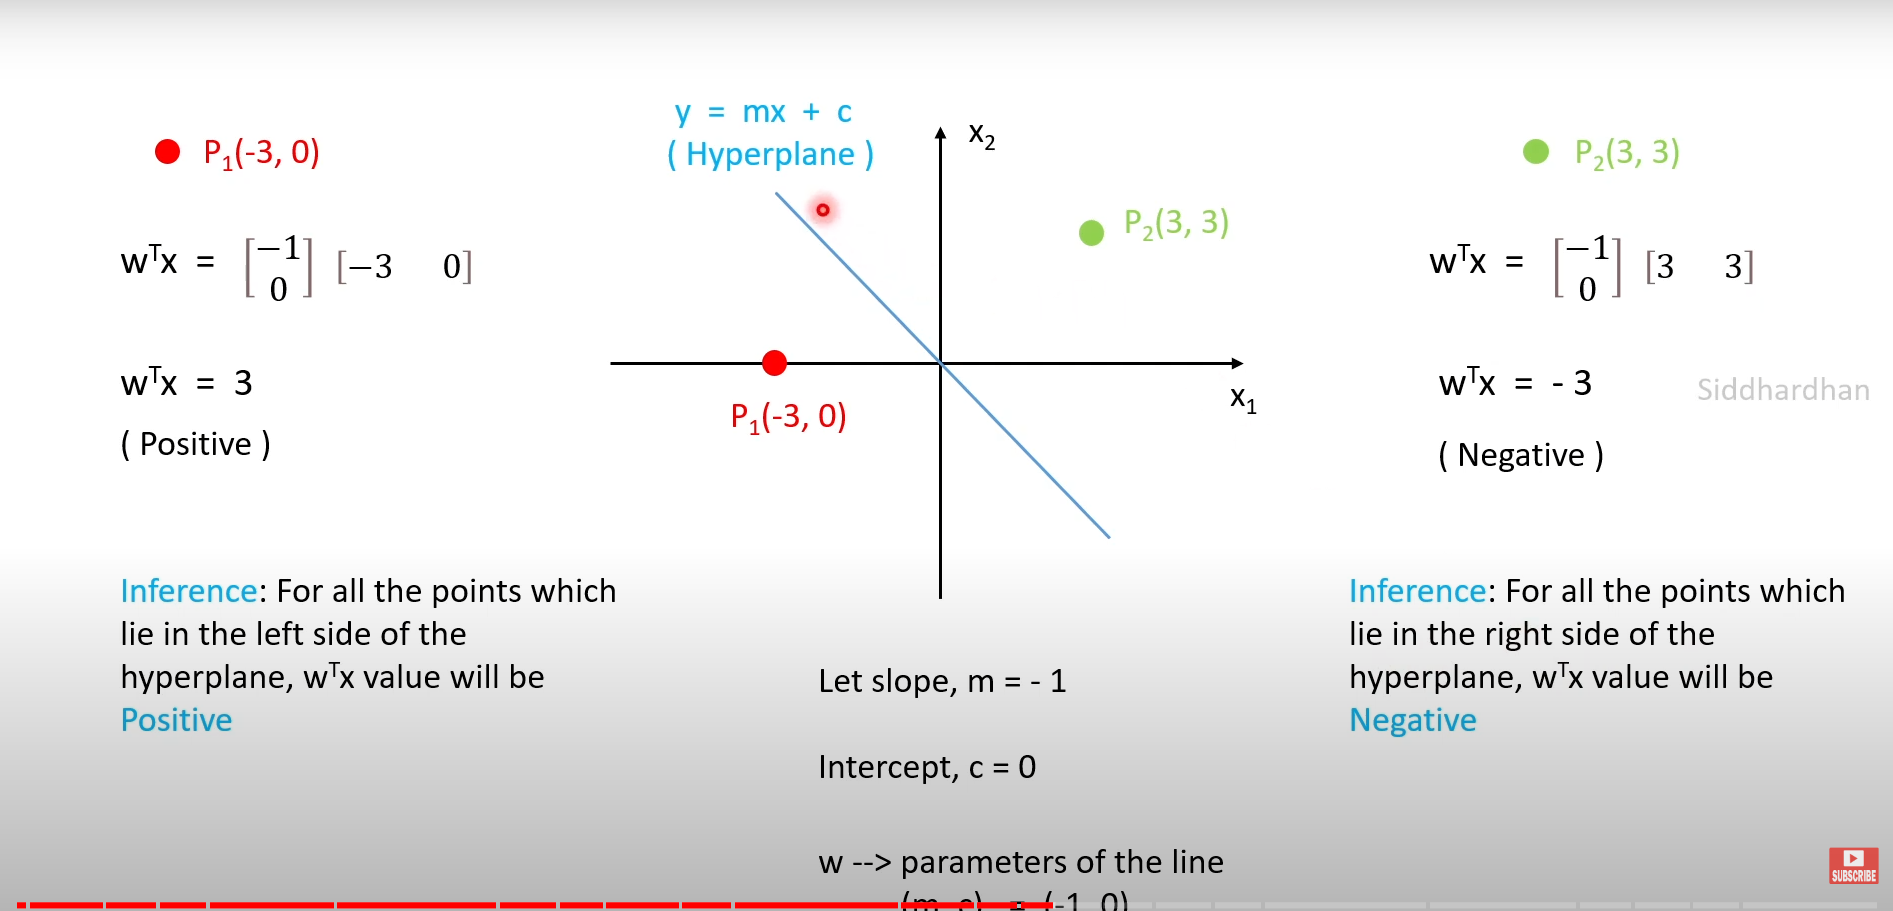

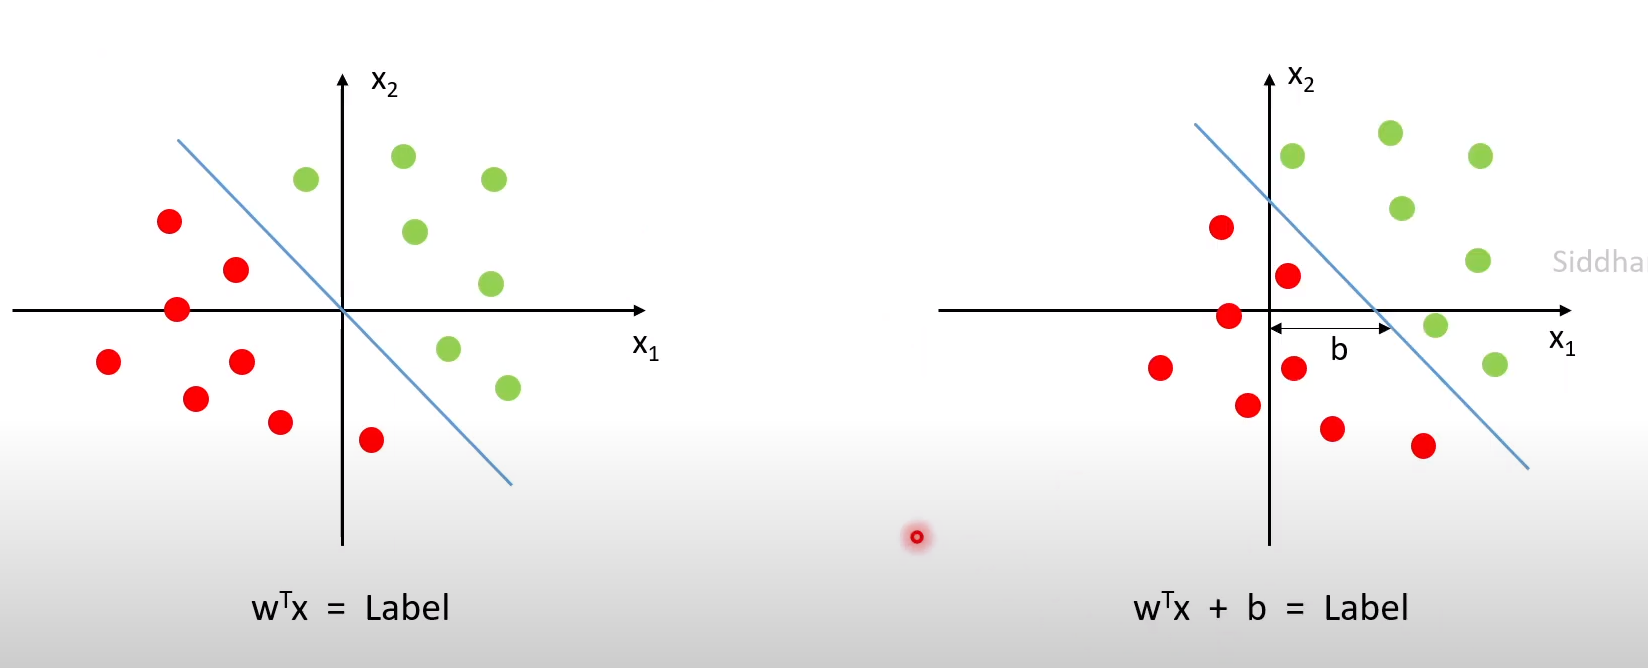

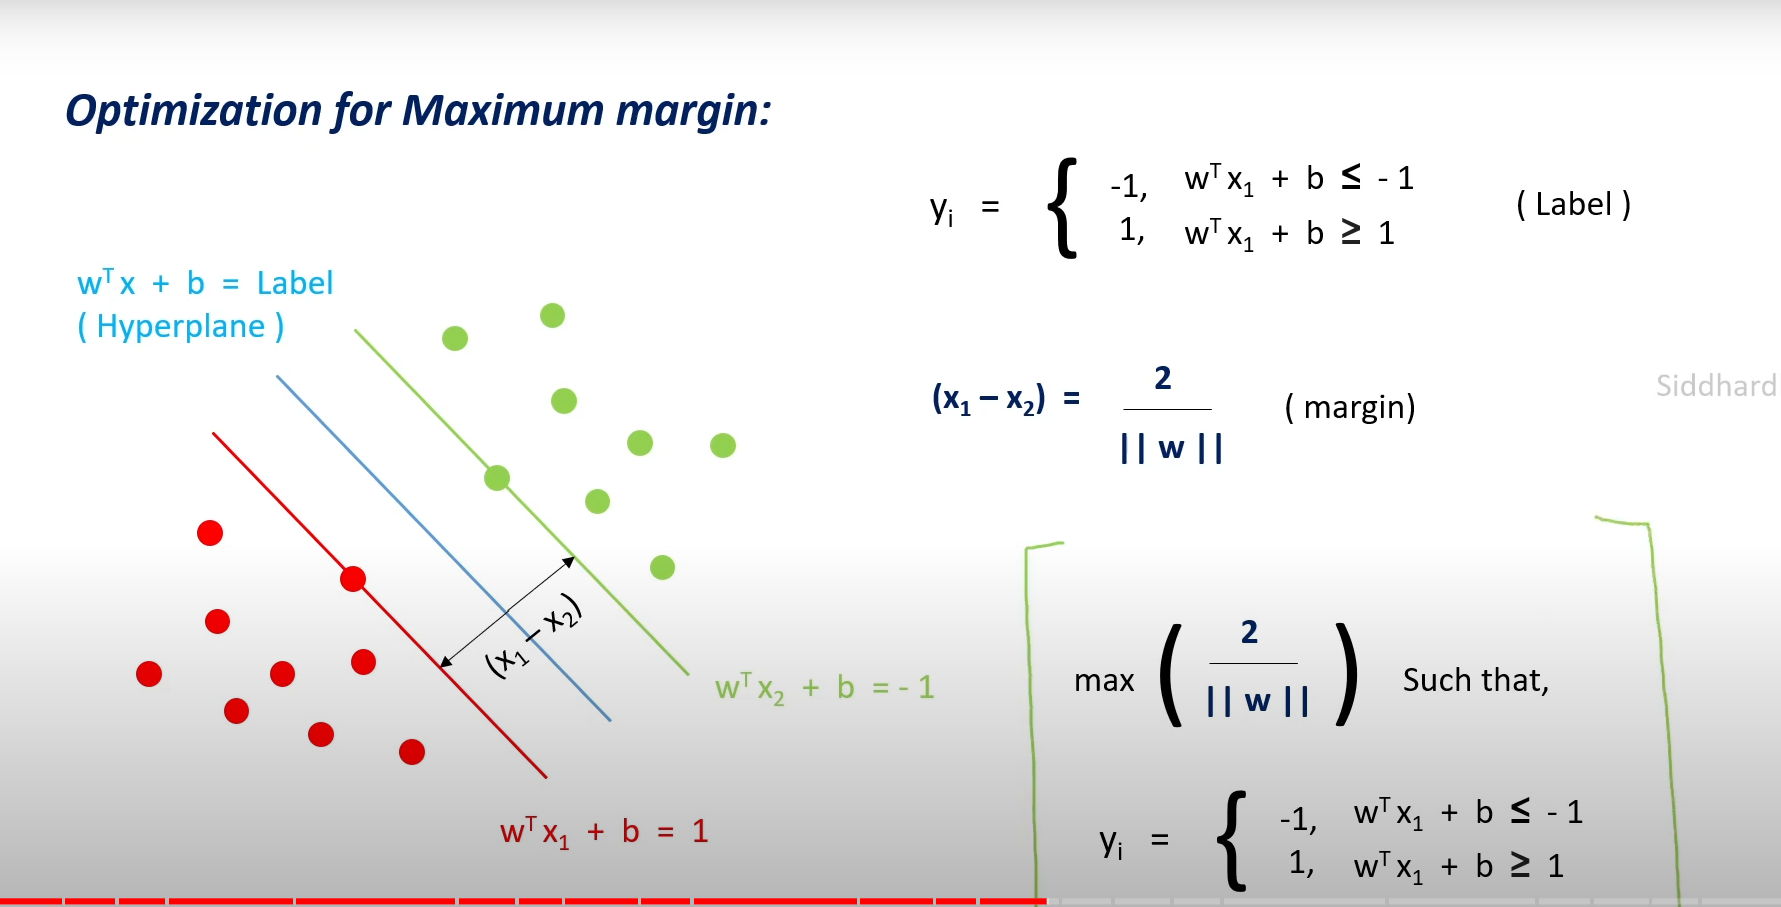

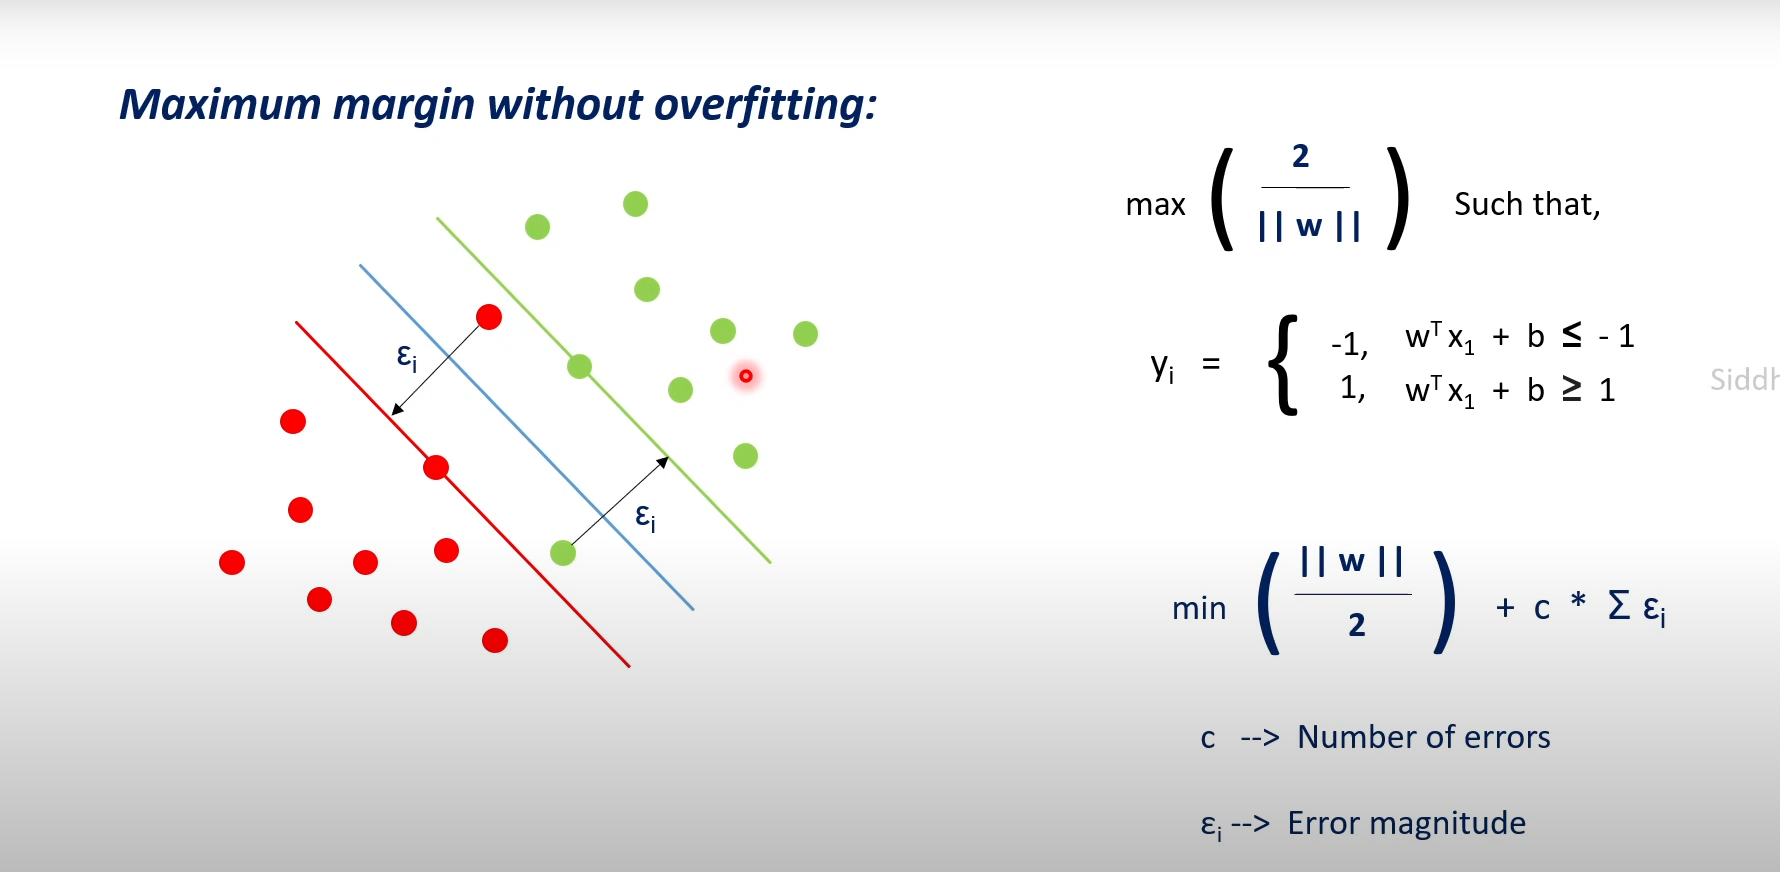

SVM Kernel

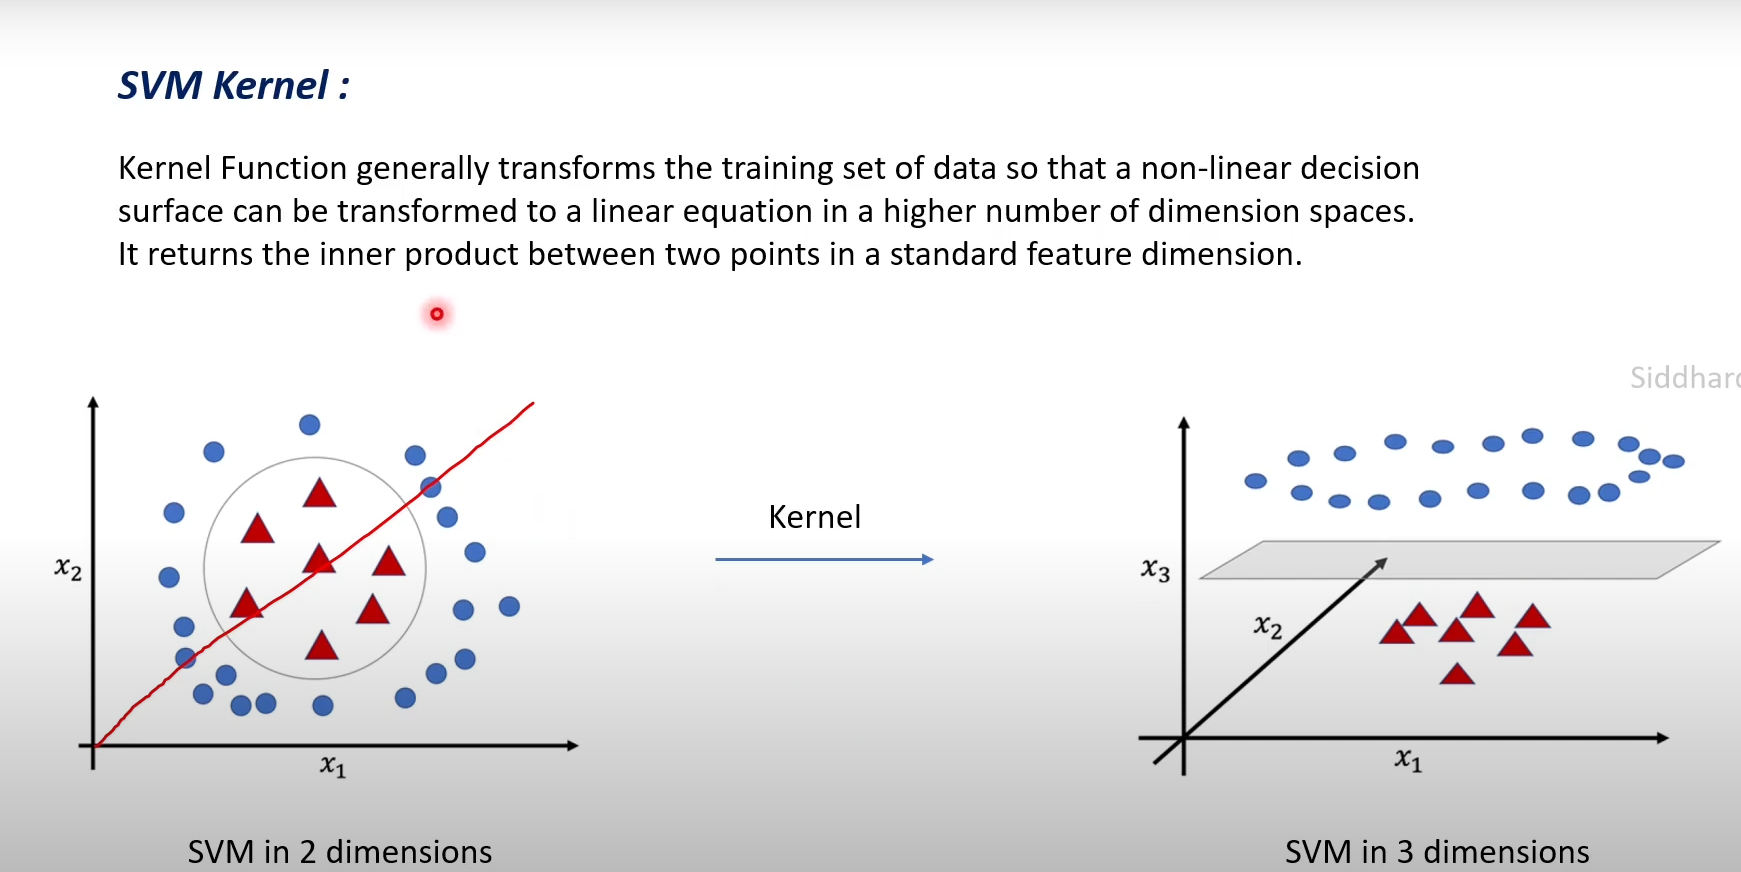

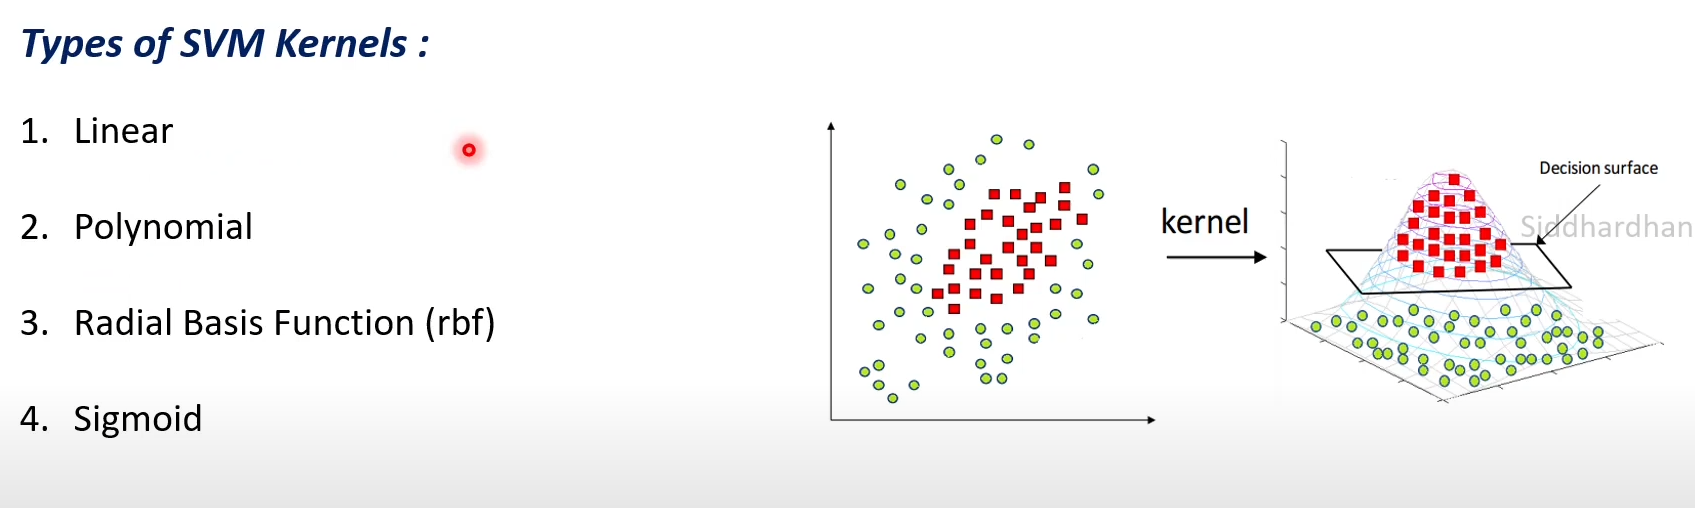

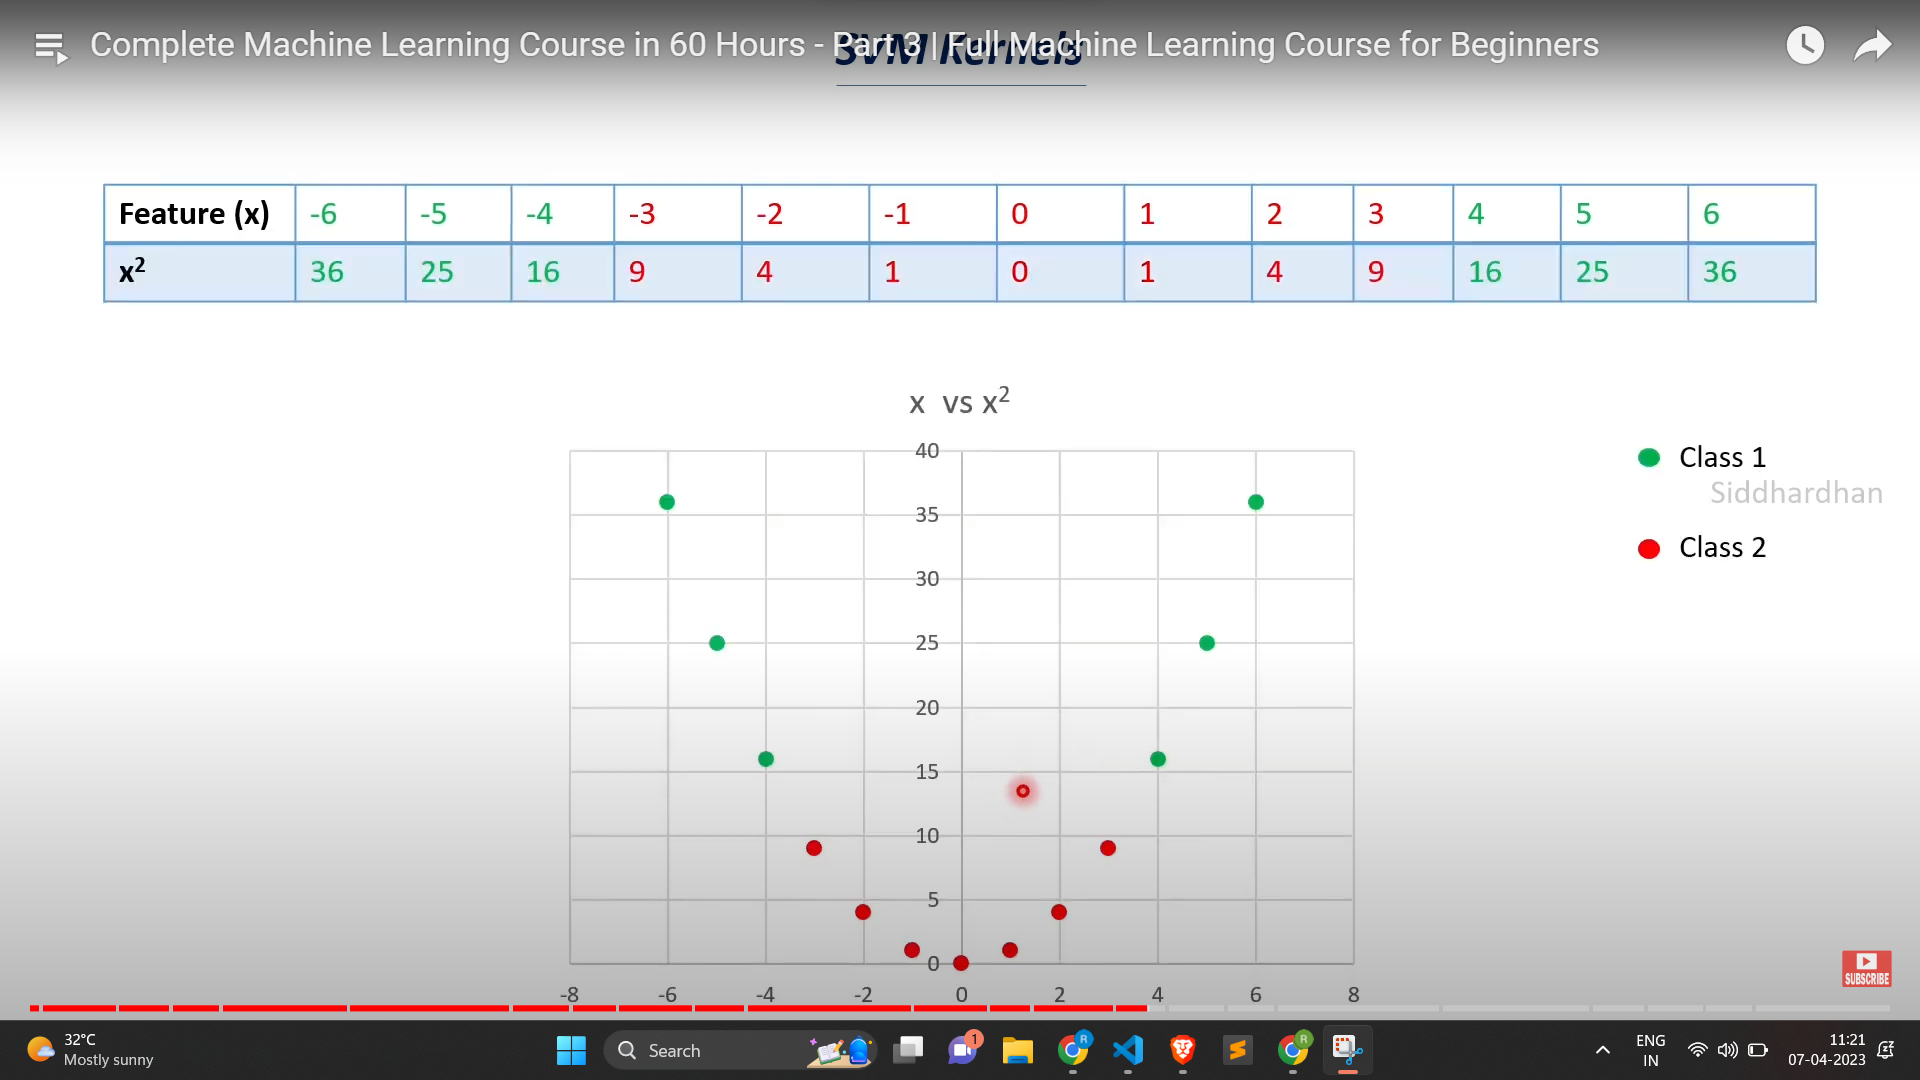

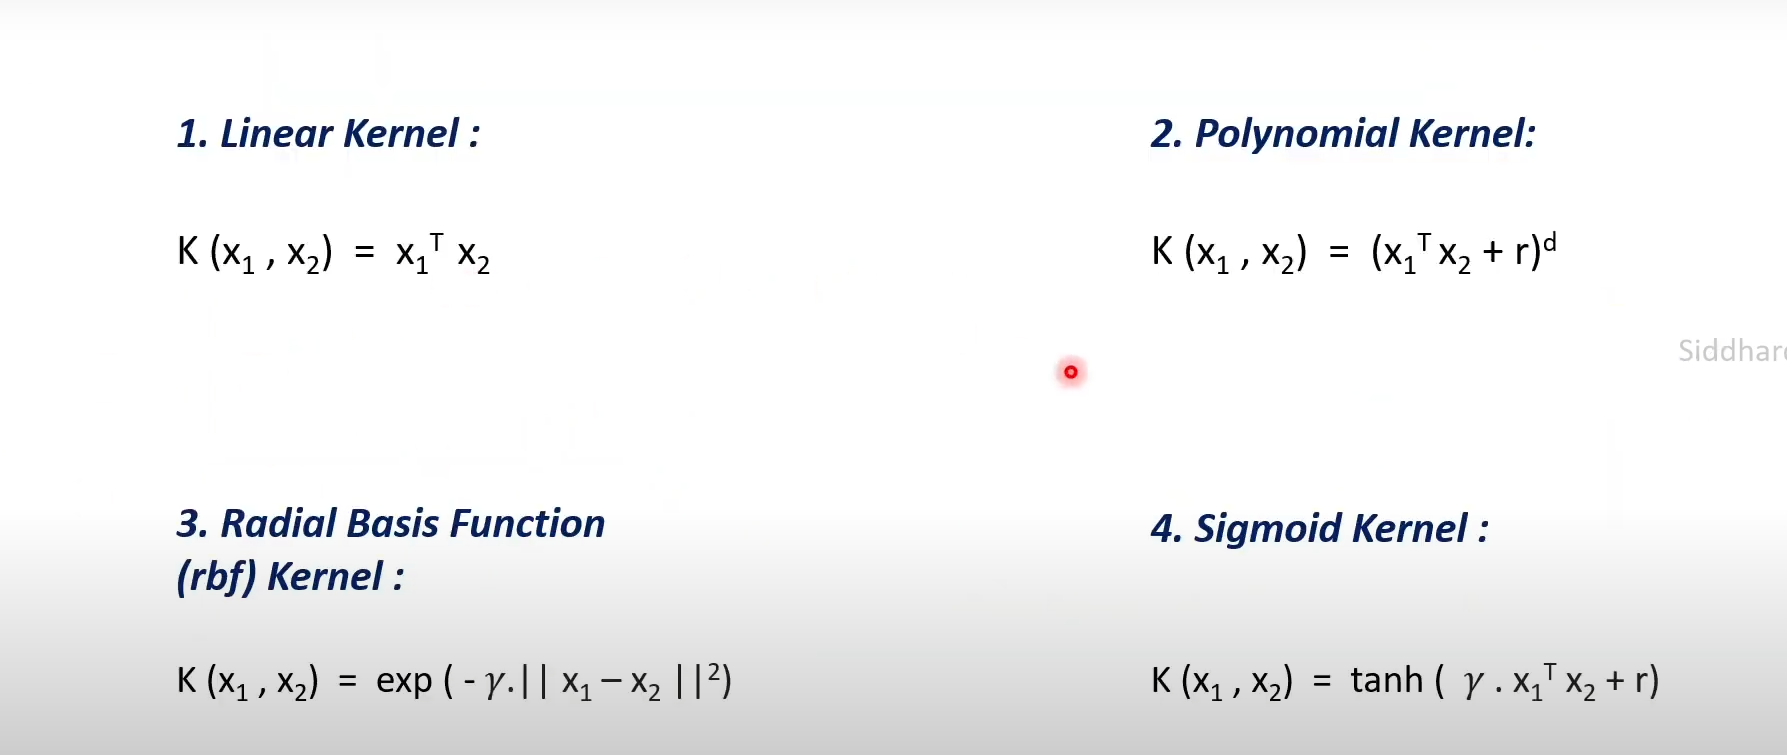

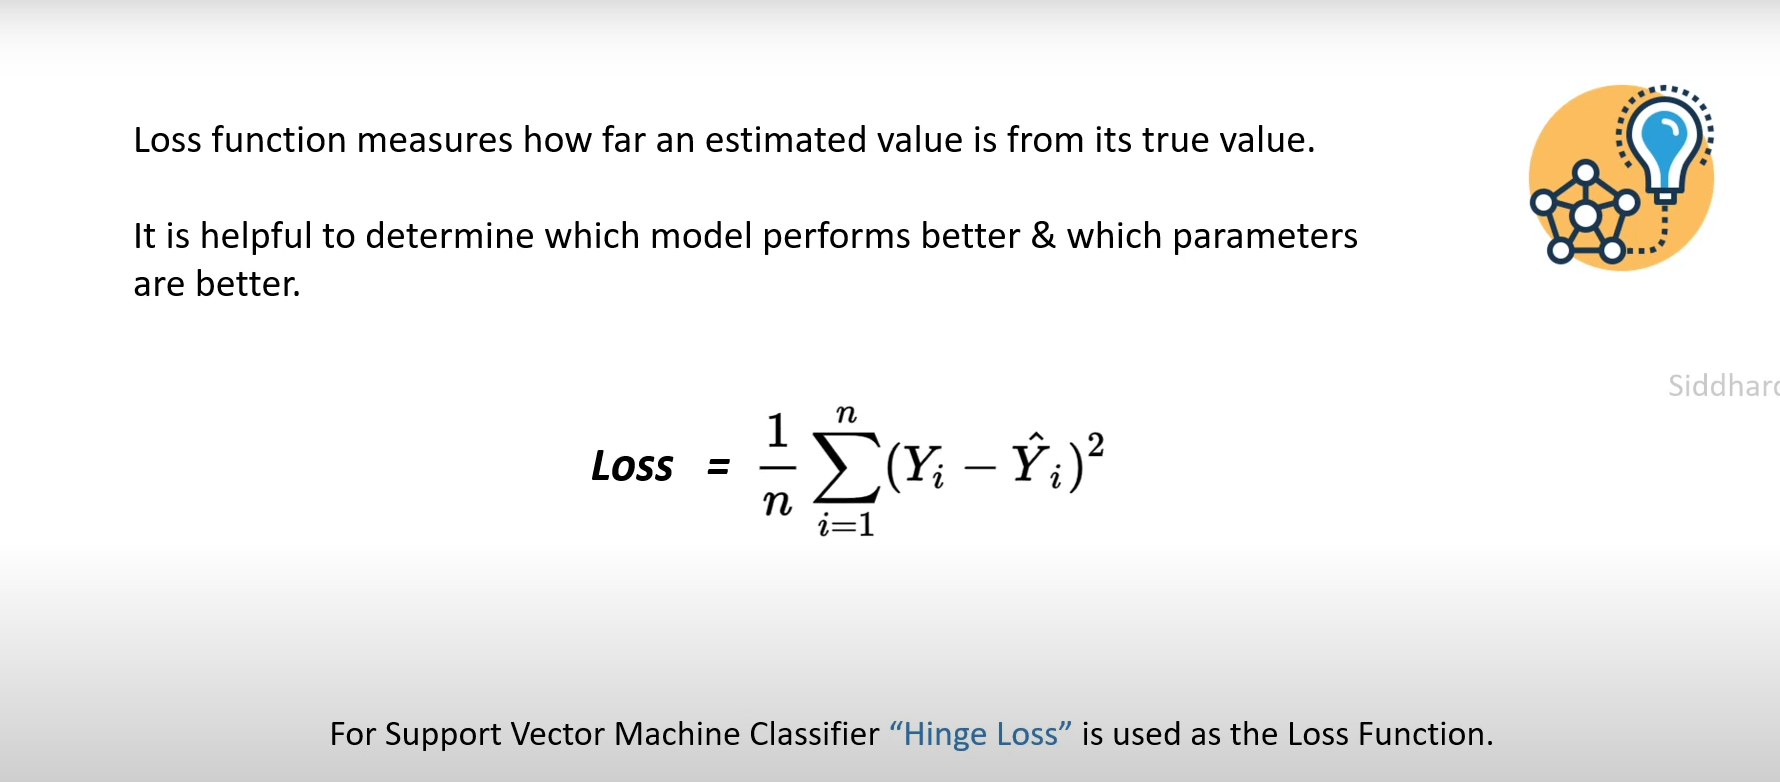

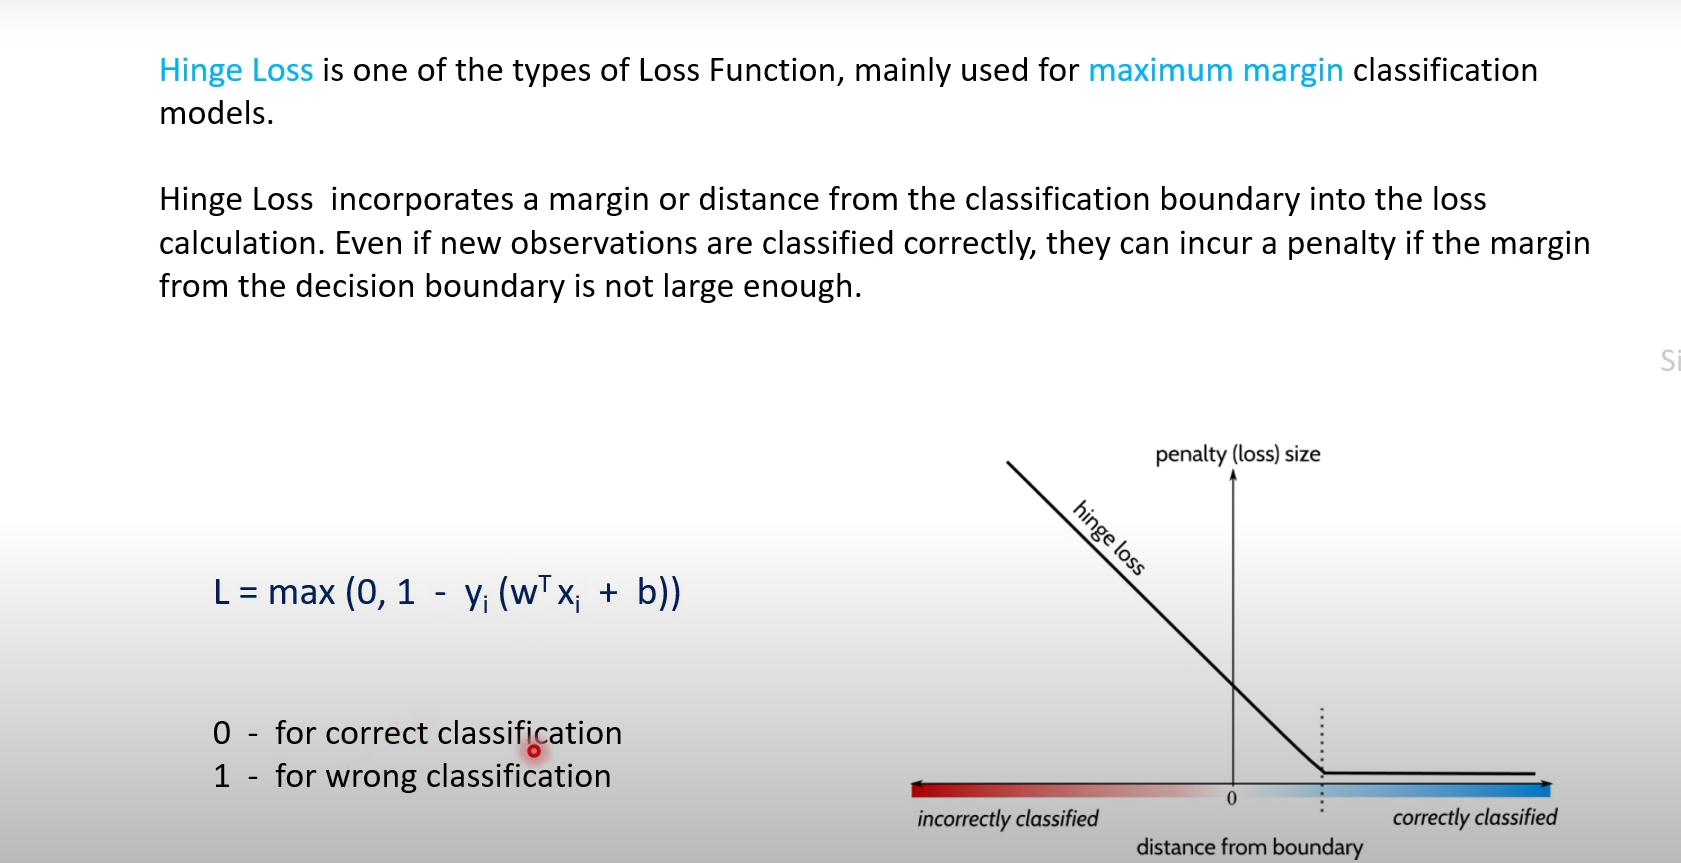

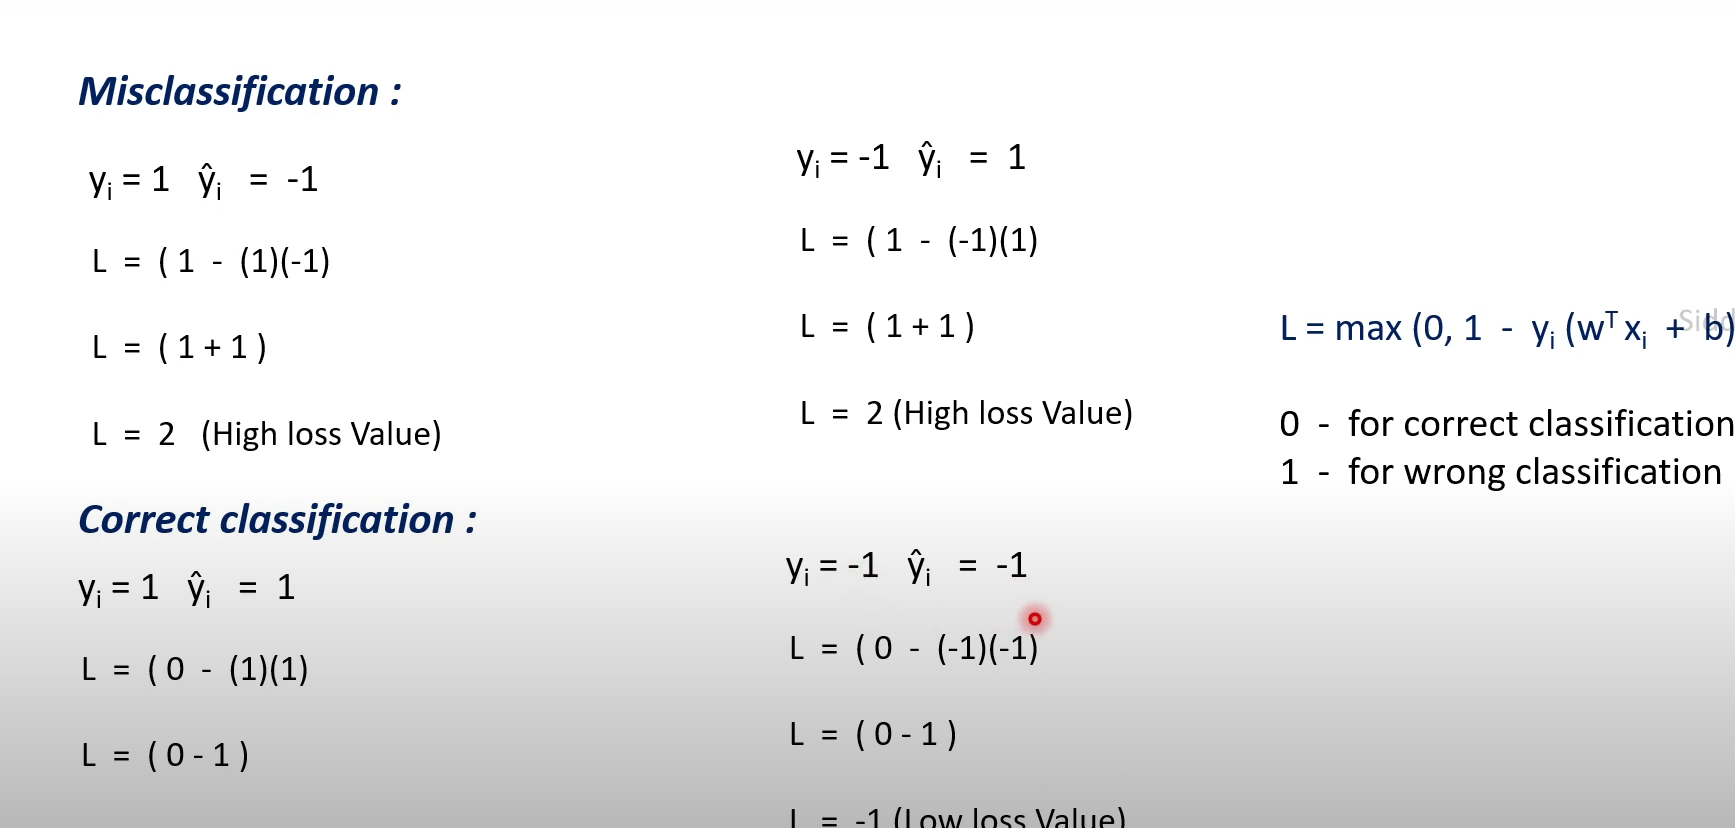

#GRADIENT DESCENT

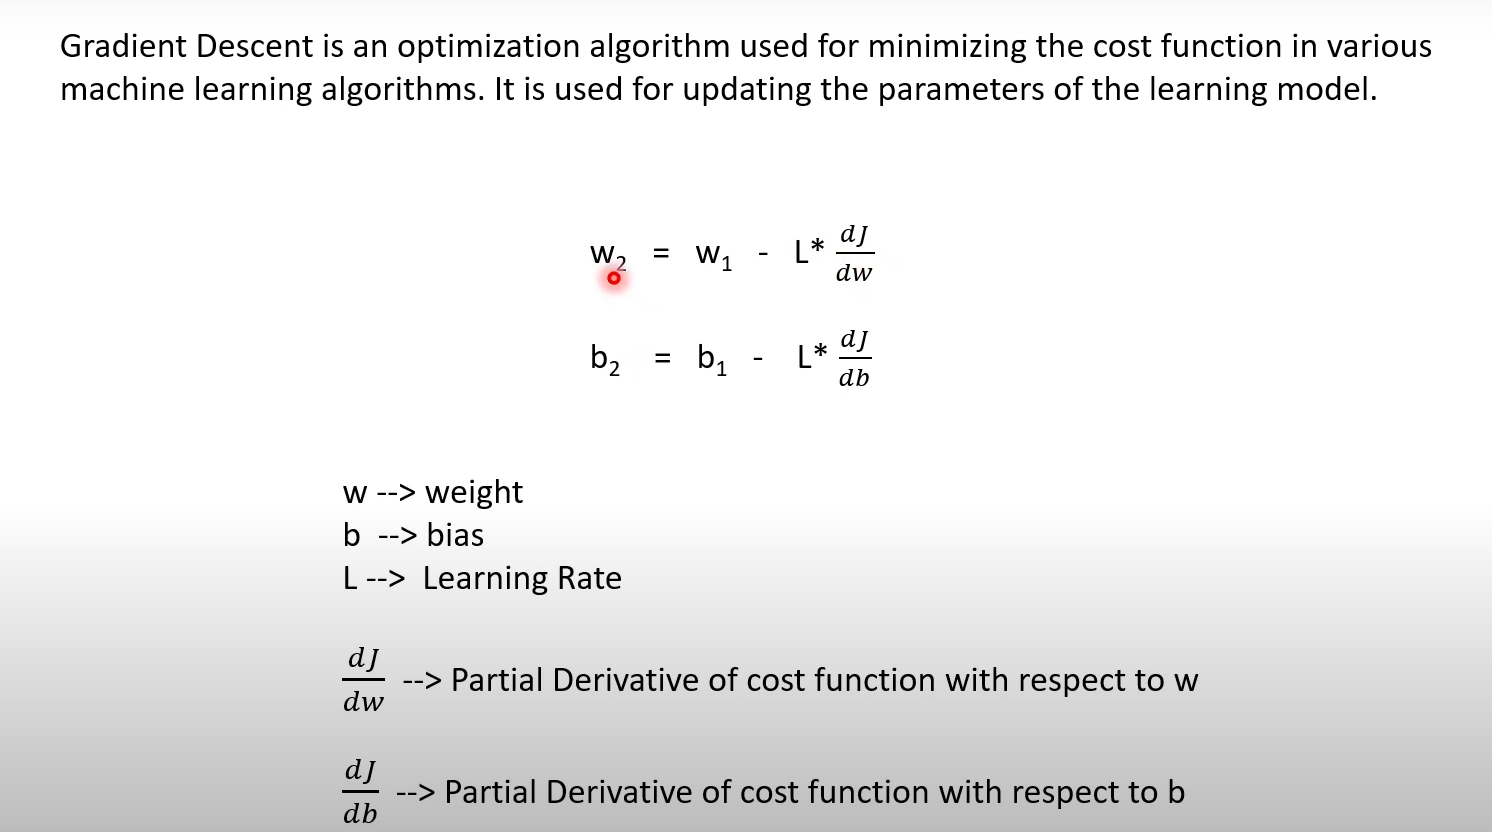

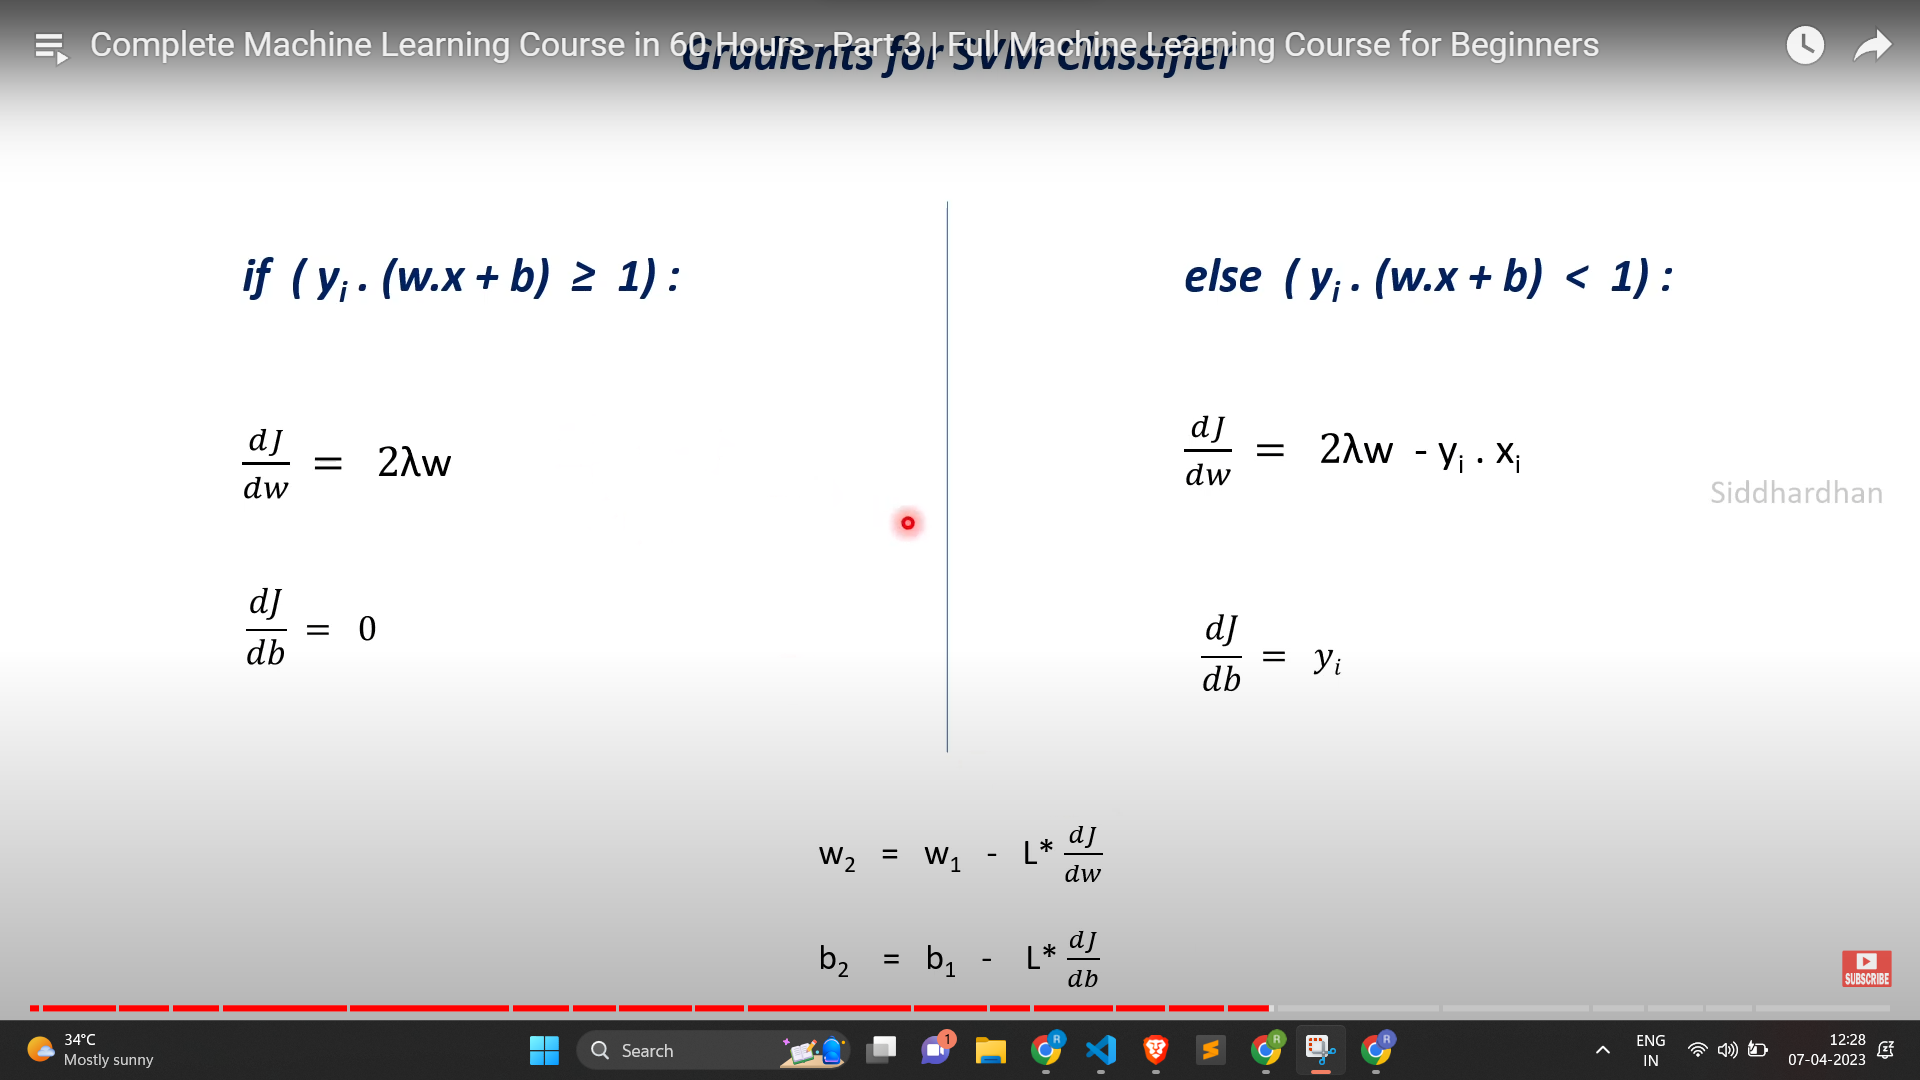

#BUILDING SVM FROM SCRATCH

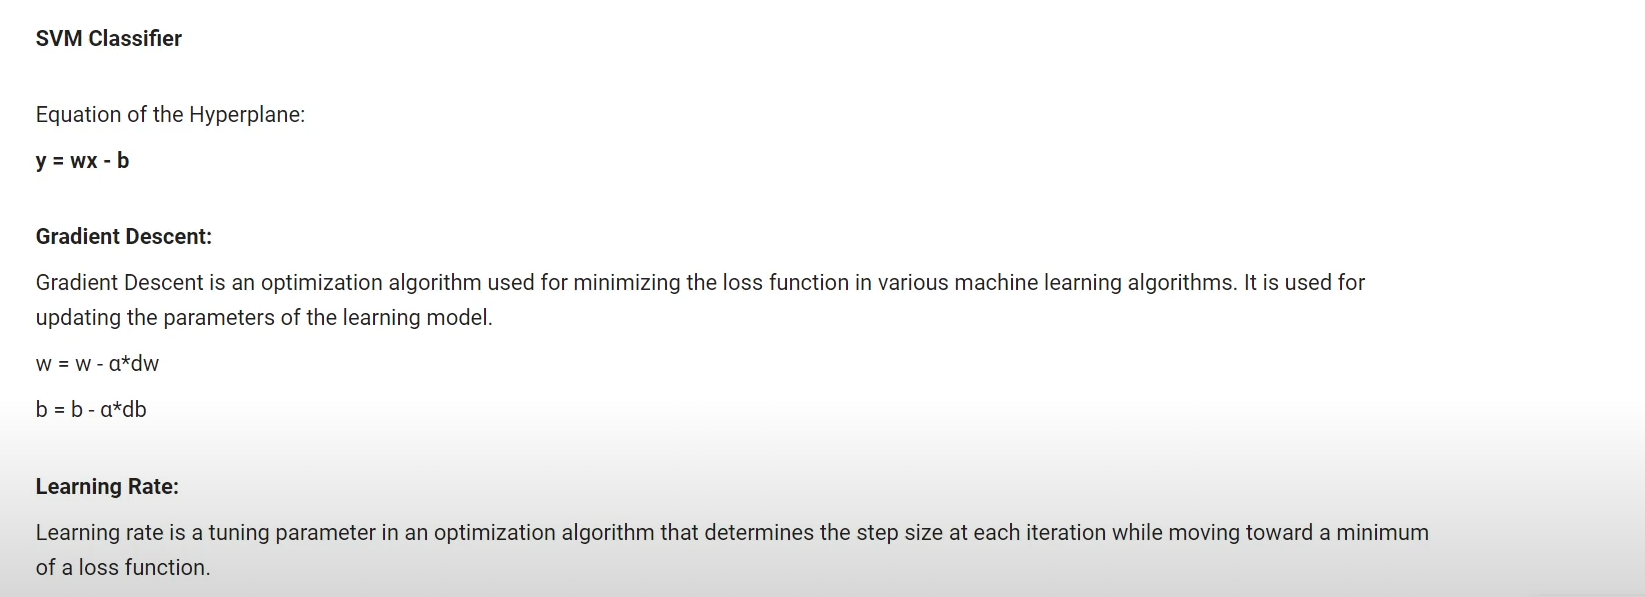

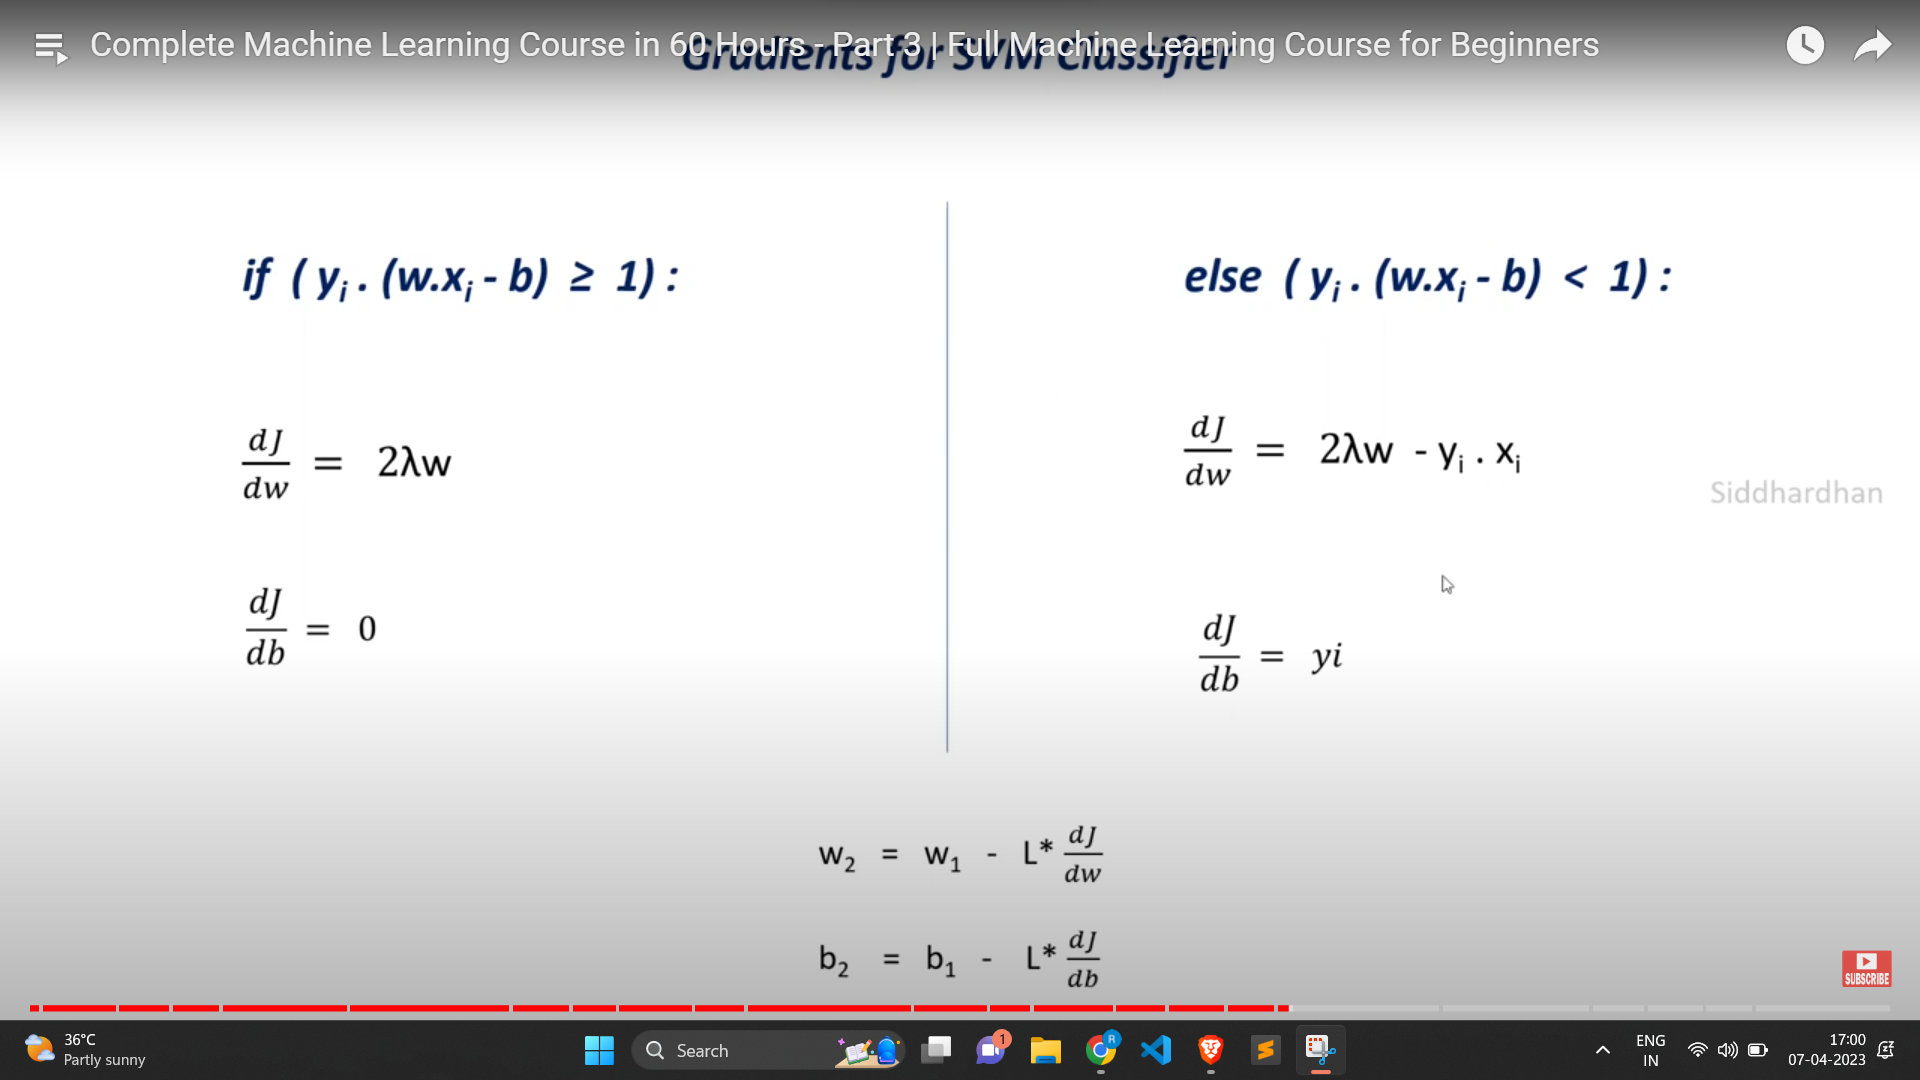

In [173]:
import numpy as np
import pandas as pd


SVM Classifier

In [174]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import SVM

In [175]:
df = pd.read_csv('/content/diabetes.csv')

In [176]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [177]:
df.shape

(768, 9)

In [178]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [179]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> non diabetic

1 -> diabetic

In [180]:
#separating the features and target
features = df.drop(columns = 'Outcome',axis = 1)
target = df['Outcome']

In [181]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [182]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [183]:
scaler = StandardScaler()

In [184]:
scaler.fit(features)

StandardScaler()

In [185]:
standardized_data = scaler.transform(features)

In [186]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [187]:
features =standardized_data
target = df['Outcome']

In [188]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train_test_split

In [189]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size = 0.2,random_state = 2)

In [190]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


Training the model

In [191]:
#SVM
classifier = SVM.SVM_classifier(learning_rate = 0.001,no_of_iterations = 1000,lambda_parameter = 0.01)

In [192]:
#training the SVm classifier to training data
classifier.fit(X_train,Y_train)

In [193]:
#acc score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score on training data is ',training_data_accuracy)

Accuracy score on training data is  0.7768729641693811


In [194]:
#acc score on testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score on testing data is ',testing_data_accuracy)

Accuracy score on testing data is  0.7532467532467533


Make a predictive system

In [195]:
input_data = (2,197,70,45,543,30.5,0.158,53)
#change data into numpy array
input_array_as_numpy_array = np.asarray(input_data)
#reshape the array
input_data_reshaped = input_array_as_numpy_array.reshape(1,-1)
#standardizing the data
standard_data = scaler.transform(input_data_reshaped)
# print(standard_data)
prediction = classifier.predict(standard_data)

print(prediction)

if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
